In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\Administrator\Desktop\c.csv')
print(df)

   number\tage\tincome\tsex\ttransportation
0                          1\t18\t850\t0\t0
1                         2\t21\t1200\t0\t0
2                          3\t23\t850\t0\t1
3                          4\t23\t950\t0\t1
4                         5\t28\t1200\t0\t1
5                          6\t31\t850\t0\t0
6                         7\t36\t1500\t0\t1
7                         8\t42\t1000\t0\t1
8                          9\t46\t950\t0\t1
9                        10\t48\t1200\t0\t0
10                       11\t55\t1800\t0\t1
11                       12\t56\t2100\t0\t1
12                       13\t58\t1800\t0\t1
13                        14\t18\t850\t1\t0
14                       15\t20\t1000\t1\t0
15                       16\t25\t1200\t1\t0
16                       17\t27\t1300\t1\t0
17                       18\t28\t1500\t1\t0
18                        19\t30\t950\t1\t1
19                       20\t32\t1000\t1\t0
20                       21\t33\t1800\t1\t0
21                       22\t33\

In [56]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
 
 
data = xlrd.open_workbook(r'C:\Users\Administrator\Desktop\data1.xlsx')
print(data)

In [169]:
data = xlrd.open_workbook(r'C:\Users\Administrator\Desktop\data1.xlsx')
sheet = data.sheet_by_index(0)
age = sheet.col_values(1)
income = sheet.col_values(2)
sex = sheet.col_values(3)
transportation=sheet.col_values(4)



In [170]:
print(sex)

['sex', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


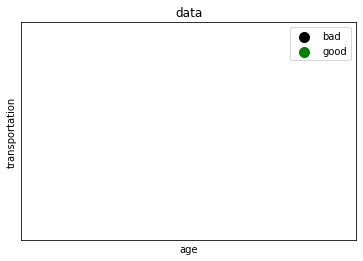

In [71]:
# 读取原始数据
X = np.array([income,sex])
# y的尺寸为(17,)
y = np.array(transportation)

X = X.reshape(29,2)
f1 = plt.figure(1)
plt.title('data')
plt.xlabel('age')
plt.ylabel('transportation')
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')


0 0.38147588128083515
1 4.950944723225031
2 3.757858643431574
3 0.4317760753882379
4 0.055964067473696845
5 9.624777931040847e-06
5 [0.9999957  0.99999139]
[[-1.2        -1.1752809   0.76311487  0.76342968  0.99999531  0.9999957 ]
 [ 1.          1.38067416 -3.17503385  0.58282478  0.94402732  0.99999139]]


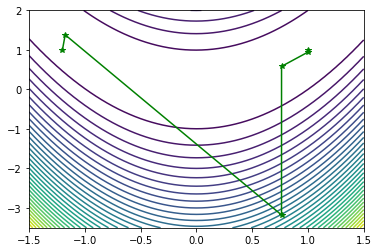

In [72]:
import random
import numpy as np
import matplotlib.pyplot as plt
 
def dampnm(fun,gfun,hess,x0):
    # 用牛顿法求解无约束问题
    #x0是初始点，fun，gfun和hess分别是目标函数值，梯度，海森矩阵的函数
    maxk = 500
    rho = 0.55
    sigma = 0.4
    k = 0
    epsilon = 1e-5
 
    f=open("牛顿.txt","w")
    W = np.zeros((2, 20000))
 
    while k < maxk:
        W[:, k] = x0
        gk = gfun(x0)
        Gk = hess(x0)
        dk = -1.0*np.linalg.solve(Gk,gk)
        print(k, np.linalg.norm(dk))
        f.write(str(k)+'   '+str(np.linalg.norm(gk))+"\n")
        if np.linalg.norm(dk) < epsilon:
            break
 
        x0 += dk
        k += 1
    W = W[:, 0:k + 1]  # 记录迭代点
    return x0,fun(x0),k,W
 
# 函数表达式fun
fun = lambda x:100*(x[0]**2-x[1])**2 + (x[0]-1)**2
 
# 梯度向量 gfun
gfun = lambda x:np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), -200*(x[0]**2-x[1])])
 
# 海森矩阵 hess
hess = lambda x:np.array([[1200*x[0]**2-400*x[1]+2, -400*x[0]],[-400*x[0],200]])
 
if __name__=="__main__":
    X1 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    X2 = np.arange(-3.5, 2 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2  # 给定的函数
    plt.contour(x1, x2, f, 40)  # 画出函数的20条轮廓线
 
    x0 = np.array([-1.2, 1])
    out=dampnm(fun, gfun, hess, x0)
    print(out[2],out[0])
 
    W = out[3]
    print(W[:,:])
 
    plt.plot(W[0, :], W[1, :], 'g*-')
    plt.show()
 
 
 

In [73]:
import numpy
def sigmoid(inX):
     'sigmoid转换函数'
     
     return 1.0/(1+numpy.exp(-inX))

In [97]:
def loadDataSet():
     '创建测试数据集，分类标签集并返回。'
     
     # 测试数据集
     dataMat = []; 
     # 测试分类标签集
     labelMat = []
     # 文本数据源
     fr = open(r'C:\Users\Administrator\Desktop\c.txt')
     
     # 载入数据
     for line in fr.readlines():
         lineArr = line.strip().split()
         dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
         labelMat.append(int(lineArr[2]))
         
     return dataMat,labelMat

In [98]:
 def gradAscent(dataMatIn, classLabels):
     '基于梯度上升法的logistic回归分类器'
    
     # 将数据集，分类标签集存入矩阵类型。 
     dataMatrix = numpy.mat(dataMatIn)
     labelMat = numpy.mat(classLabels).transpose()
    
     # 上升步长度
     alpha = 0.00001
     # 迭代次数
     maxCycles = 500
     # 初始化回归参数向量
     m,n = numpy.shape(dataMatrix)
     weights = numpy.ones((n,1))
     
     # 对回归系数进行maxCycles次梯度上升
     for k in range(maxCycles):
         h = sigmoid(dataMatrix*weights)
         error = (labelMat - h) 
         weights = weights + alpha * dataMatrix.transpose()* error
         
     return weights


In [99]:
def test():
     '测试'
     
     dataArr, labelMat = loadDataSet()
     print (gradAscent(dataArr, labelMat))


In [101]:

if __name__=="__main__":
    test()

[[0.99764551]
 [0.79659493]
 [0.12755183]]


In [108]:
#提取训练集
frTrain = open(r'C:\Users\Administrator\Desktop\c.txt')#训练集原始数据

trainingSet = [];trainingLabels = []
for line in frTrain.readlines():
    currLine = line.strip().split('\t')
    lineArr = []
    for i in range(4):
        lineArr.append(float(currLine[i]))
    trainingSet.append(lineArr)#提取训练集
    trainingLabels.append(float(currLine[3]))#提取训练集标签

 
from sklearn.linear_model import LogisticRegression
 
logistic_classifiy = LogisticRegression(penalty ='l2',dual = False,tol = 0.0001,C = 1.0,fit_intercept = True,
                                        intercept_scaling = 1,class_weight = None,random_state = None,
                                        solver ='newton-cg',max_iter = 100, multi_class ='ovr',verbose = 0,
                                        warm_start = False,n_jobs = 1)
logistic_classifiy.fit(trainingSet,trainingLabels)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [111]:
"""
功能：逻辑回归
说明：
作者：唐天泽
博客：http://blog.csdn.net/u010837794/article/details/
日期：2017-08-14
"""

"""
导入项目所需的包
"""
import numpy as np
import matplotlib.pyplot as plt

# 使用交叉验证的方法，把数据集分为训练集合测试集
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 加载数据集
def load_data():
    diabetes = open(r'C:\Users\Administrator\Desktop\c.txt')

    # 将数据集拆分为训练集和测试集 
    X_train, X_test, y_train, y_test = train_test_split(
    diabetes, diabetes, test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test

# 使用LogisticRegression考察线性回归的预测能力
def test_LogisticRegression(X_train, X_test, y_train, y_test):
    # 选择模型
    cls = LogisticRegression()

    # 把数据交给模型训练
    cls.fit(X_train, y_train)

    print("Coefficients:%s, intercept %s"%(cls.coef_,cls.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((cls.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % cls.score(X_test, y_test))

if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data() # 产生用于回归问题的数据集
    test_LogisticRegression(X_train,X_test,y_train,y_test) # 调用 test_LinearRegression

TypeError: Singleton array array(<_io.TextIOWrapper name='C:\\Users\\Administrator\\Desktop\\c.txt' mode='r' encoding='cp936'>,
      dtype=object) cannot be considered a valid collection.

In [121]:
"""
功能：逻辑回归
说明：
作者：唐天泽
博客：http://blog.csdn.net/u010837794/article/details/
日期：2017-08-14
"""

"""
导入项目所需的包
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 使用交叉验证的方法，把数据集分为训练集合测试集
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 加载iris数据集
def load_data():
    diabetes = pd. read_excel(r'C:\Users\Administrator\Desktop\data1.xlsx')

    # 将数据集拆分为训练集和测试集 
    X_train, X_test, y_train, y_test = train_test_split(
    diabetes.num, diabetes.target, test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test

# 使用LogisticRegression考察线性回归的预测能力
def test_LogisticRegression(X_train, X_test, y_train, y_test):
    # 选择模型
    cls = LogisticRegression()

    # 把数据交给模型训练
    cls.fit(X_train, y_train)

    print("Coefficients:%s, intercept %s"%(cls.coef_,cls.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((cls.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % cls.score(X_test, y_test))

if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data() # 产生用于回归问题的数据集
    test_LogisticRegression(X_train,X_test,y_train,y_test) # 调用 test_LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[26. 17.  2. 11. 28. 27.  9.  7.  5. 19. 20. 10.  8. 24.  4.  1. 22. 16.
 13.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [113]:
diabetes = datasets.load_iris()


In [115]:
print(diabetes)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [128]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
column_name=['num','age','income','sex']
data=open(r'C:\Users\Administrator\Desktop\d.xls')



data=data.replace(to_replace='?',value=np.nan)
data=data.dropna(how='any')

X_train,X_test,y_train,y_test=\
    train_test_split(data[column_name[1:4]],data[column_name[4]],test_size=0.25,
                     random_state=33)

#print y_train.value_counts()
#print y_test.value_counts()

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)



lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pre=lr.predict(X_test)
print(lr.score(X_test,y_test))
print(classification_report(y_test,lr_pre,
                            target_names=['Benign','Malignant']))



print

sgdc=SGDClassifier(loss='log')

sgdc.fit(X_train,y_train)
sgdc_pre = sgdc.predict(X_test)

print(sgdc.score(X_test,y_test))

print(classification_report(y_test,sgdc_pre,
                            target_names=['Benign','Malignant']))


AttributeError: '_io.TextIOWrapper' object has no attribute 'replace'

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 导入数据集
dataset =xlrd.open_workbook(r'C:\Users\Administrator\Desktop\data1.xlsx')
sheet = dataset.sheet_by_index(0)

transportation=sheet.col_values(4)
X = sheet.col_values(3)
Y = sheet.col_values(4)

# 将数据集分成训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
y_test = pd.Series(y_test)

# 简单的预处理，特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 构建模型，预测测试集结果
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ValueError: could not convert string to float: 'sex'

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 导入数据集
dataset =xlrd.open_workbook(r'C:\Users\Administrator\Desktop\data1.xlsx')
sheet = dataset.sheet_by_index(0)

transportation=sheet.col_values(4)
X = sheet.col_values(3)
print(X)

['sex', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [151]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# 1.加载数据
iris = datasets.load_iris()
X = iris.data[:, :2]  # 使用前两个特征
Y = iris.target
#np.unique(Y)   # out: array([0, 1, 2])

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# 设置随机数种子，以便比较结果。

# 3.标准化特征值
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 4. 训练逻辑回归模型
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

# 5. 预测
prepro = logreg.predict_proba(X_test_std)
acc = logreg.score(X_test_std,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [167]:
"""
功能：逻辑回归
说明：
作者：唐天泽
博客：http://blog.csdn.net/u010837794/article/details/
日期：2017-08-14
"""

"""
导入项目所需的包
"""
import numpy as np
import matplotlib.pyplot as plt

# 使用交叉验证的方法，把数据集分为训练集合测试集
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
diabetes = {'data': array([[18,850,0],[21,1200,0],[23,850,0],[23,950,0],[28,1200,0],[31,850,0],[36,1500,0],[42,1000,0],[46,950,0],[48,1200,0],[55,1800,0],[56,2100,0],[58,1800,0],[18,850,1],[20,1000,1],[25,1200,1],[27,1300,1],[28,1500,1],[30,950,1],[32,1000,1],[33,1800,1],[33,1000,1],[38,1200,1],[41,1500,1],[45,1800,1],[48,1000,1],[52,1500,1],[56,1800,1]]),
                'target': array([0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1])}
# 加载iris数据集
def load_data():
   
    # 将数据集拆分为训练集和测试集 
    X_train, X_test, y_train, y_test = train_test_split(
    diabetes[data], diabetes[target], test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test

# 使用LogisticRegression考察线性回归的预测能力
def test_LogisticRegression_multiomaial(X_train, X_test, y_train, y_test):
    # 选择模型
    cls = LogisticRegression(multi_class='multinomial',solver='newton-cg')

    # 把数据交给模型训练
    cls.fit(X_train, y_train)

    print("Coefficients:%s, intercept %s"%(cls.coef_,cls.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((cls.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % cls.score(X_test, y_test))

if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data() # 产生用于回归问题的数据集
    test_LogisticRegression_multiomaial(X_train,X_test,y_train,y_test) # 调用 test_LinearRegression

KeyError: <_io.TextIOWrapper name='C:\\Users\\Administrator\\Desktop\\d.xls' mode='r' encoding='cp936'>

In [154]:
datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [162]:
diabetes = {'data': array([[18,850,0,0],[21,1200,0],[23,850,0],[23,950,0],[28,1200,0],[31,850,0],[36,1500,0],[42,1000,0],[46,950,0],[48,1200,0],[55,1800,0],[56,2100,0],[58,1800,0],[18,850,1],[20,1000,1],[25,1200,1],[27,1300,1],[28,1500,1],[30,950,1],[32,1000,1],[33,1800,1],[33,1000,1],[38,1200,1],[41,1500,1],[45,1800,1],[48,1000,1],[52,1500,1],[56,1800,1]]),
                'target': array([0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1])}

In [166]:
diabetes[data]

KeyError: <_io.TextIOWrapper name='C:\\Users\\Administrator\\Desktop\\d.xls' mode='r' encoding='cp936'>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from pandas import Series, DataFrame

# 输入数据集
data = xlrd.open_workbook(r'C:\Users\Administrator\Desktop\data1.xlsx')
sheet = data.sheet_by_index(0)
age = sheet.col_values(1)
income = sheet.col_values(2)
sex = sheet.col_values(3)
transportation=sheet.col_values(4)
X_train=DataFrame(age,income,sex)
y_train=transportation


# 使用LogisticRegression考察线性回归的预测能力
def test_LogisticRegression_multiomaial(X_train,y_train):
    # 选择模型
    cls = LogisticRegression(multi_class='multinomial',solver='newton-cg')

    # 把数据交给模型训练
    cls.fit(X_train, y_train)

    print("Coefficients:%s, intercept %s"%(cls.coef_,cls.intercept_))


if __name__=='__main__':
    test_LogisticRegression_multiomaial(X_train,y_train) # 调用 test_LinearRegression

ValueError: Shape of passed values is (29, 1), indices imply (29, 29)

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from pandas import Series, DataFrame

# 输入数据集
data = xlrd.open_workbook(r'C:\Users\Administrator\Desktop\data1.xlsx')
sheet = data.sheet_by_index(0)
age = sheet.col_values(1)
income = sheet.col_values(2)
sex = sheet.col_values(3)
transportation=sheet.col_values(4)
X_train=DataFrame(age,income,sex)
y_train=transportation

ValueError: Shape of passed values is (29, 1), indices imply (29, 29)

In [176]:
X=DataFrame(age,income)

In [177]:
X


,0
income,age
850.0,18
1200.0,21
850.0,23
950.0,23
1200.0,28
850.0,31
1500.0,36
1000.0,42
950.0,46
